In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
#downloading cifar images
#maxpooling: to extract more data/content from image
#this dataset has 60K images and 10 classes
# 50k training and 10K testing. There is no overlap between test and train data

(train_images, train_labels), (test_images, test_labels) =datasets.cifar10.load_data()

In [5]:
#normalizing pixel values between 0 and 1
train_images, test_images  = train_images/255.0 , test_images/255.0
# if pixel values are 0 then it will be considered as 0 and if 1 (black), then 255/255=1


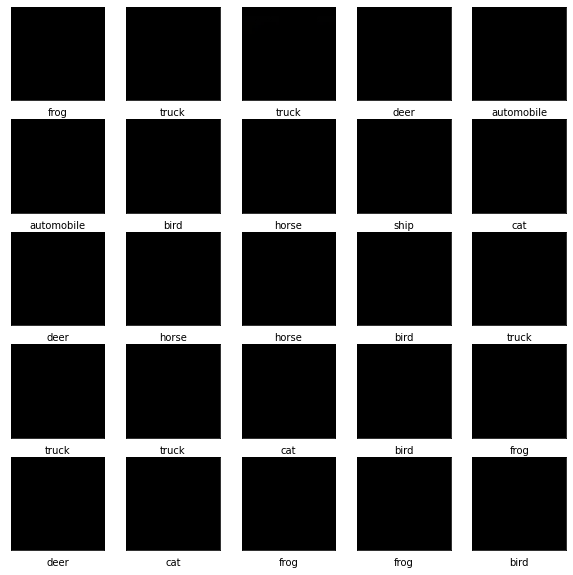

In [6]:
#verifying data
#plotting 25 mages from training set snd show class names

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Creating convolution neural network
1. Input layer: a CNN takes tensors of shape (image_height, image_width, color_channels (RGB)
2. Batch size is ignored.
3. here, I am configuring CNN to process inputs of shape (32, 32, 3) which is again height, width and color channel
4. You can do this by passing the argument input_shape to your first layer.


In [7]:
model = models.Sequential() # sequential model
# 1st layer is input layer imaage of 32,32,3. 
# 1st parameter: Conv2D(32 is number of filters 32 filters which is 3X3 size
# activation used is ReLu
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

#maxpooling: 2 dimesnion layer -> which consider the highest value of the image pixel
model.add(layers.MaxPooling2D((2, 2)))

# 2nd convo layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))


## how to decise number of filters? 
- Filters here is hyper parameter tuning. 
- I can check with other combination, but as a state of art algo I have used 32 followed by 64
- This has been researched to get better accuracy

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

## Description:
- output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). 
- The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). 
- Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

In [9]:
# flattening layer

model.add(layers.Flatten())

### Adding fully connected layer using dense()

- Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. 
- Dense Layer is used to classify image based on output from convolutional layers.
- First Dense of dimension 64, which should match with last layer which was also 64 dim. As this is dense/fully connected it is 1 to 1 connection. 
- Last layer is output layer, where i have taken fully connected network with 10 neurons. 

In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Training model
- Adam optimiser is used. 
- Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
- As I have 10 ouput, I have used crossentropy
- print accuracy 
 
## Testing model
- 10 epochs 

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.3028 - accuracy: 0.0999 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 56s 36ms/step - loss: 2.3028 - accuracy: 0.0995 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 56s 36ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3026 -

Epoch 1/10
1563/1563 [==============================] - 59s 37ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 56s 36ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 56s 36ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 56s 36ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 56s 36ms/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 2.3028 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 -

## Model evaluation

313/313 - 3s - loss: 2.3026 - accuracy: 0.1000 - 3s/epoch - 10ms/step


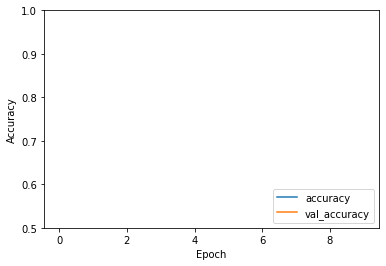

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)